# Lesson 14 - K-Nearest Neighbors

### The following topics are discussed in this notebook:
* K-Nearest Neighbors Algorithm


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import MLUtilities as mlu
import ipywidgets as widgets

## K-Nearest Neighbors Algorithm

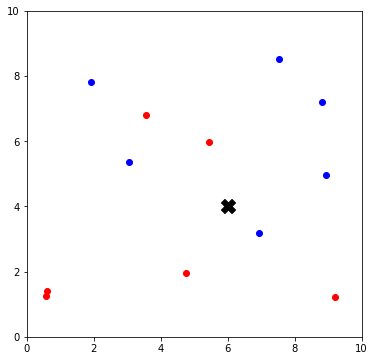

In [2]:
np.random.seed(391)

X = np.random.uniform(0,10,24).reshape(12,2)
y = np.array(['red']*6 + ['blue']*6)

plt.close()
plt.rcParams["figure.figsize"] = [6,6]
plt.scatter(X[:6,0],X[:6,1], c='r')
plt.scatter(X[6:,0],X[6:,1], c='b')
plt.scatter([6],[4], c='k', marker='X', s=200)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Preliminary: The argsort Function

In [3]:
my_array = [7.8, 5.7, 4.8, 1.3, 6.4]
print(np.sort(my_array))
print(np.argsort(my_array)) # return array of the indices of 

[ 1.3  4.8  5.7  6.4  7.8]
[3 2 1 4 0]


## Classifying a single point

In [5]:
P = np.array([6,4])
K = 5

n = len(y)

sq_distances = (P[0] - X[:,0])**2 + (P[1] - X[:,1])**2
#print(sq_distances)
idx = np.argsort(sq_distances)[:K] # np.argsort(sq_distances) is nparray
d_knn = sq_distances[idx]

y_knn = y[idx]
#print(y_knn)

n_blue = np.sum(y_knn == 'blue')
n_red = np.sum(y_knn == 'red')

dist_blue = np.sum(d_knn[y_knn == 'blue'])
dist_red = np.sum(d_knn[y_knn == 'red'])

if(n_red > n_blue):
    print('The predicted class for the point ', P, 'is \"red\".')
elif(n_red < n_blue) :
    print('The predicted class for the point ', P, 'is \"blue\".')
elif(dist_blue < dist_red):
    print('The predicted class for the point ', P, 'is \"blue\".')
else :
    print('The predicted class for the point ', P, 'is \"red\".')
    

The predicted class for the point  [6 4] is "blue".


In [6]:
print(d_knn)
print(y_knn)

[  1.51252734   4.18408571   5.75691833   9.47026221  10.46994887]
['blue' 'red' 'red' 'blue' 'blue']


## KNN in Scikit-Learn

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.neighbors import KNeighborsRegressor regression

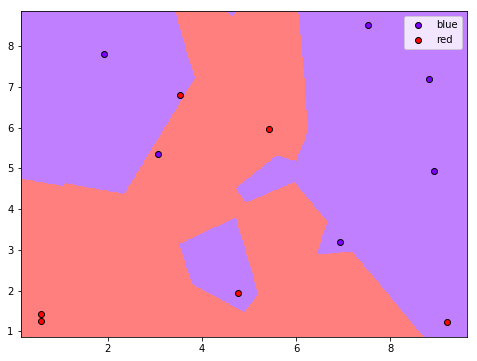

In [10]:
mod = KNeighborsClassifier(n_neighbors=3) # try changing 3 to 1
#n_neighbors=1 gives us accuracy=1.00 and overfitiing
mod.fit(X,y) # this is equivalent to make a constructor

mlu.plot_regions(mod, X, y, num_ticks=500) #num_ticks is for getting smoother boundaries

## The Effect of Changing K

In [11]:
df = pd.read_table(filepath_or_buffer='Datasets\knn_example.txt', sep='\t')

X = np.array(df.iloc[:,:2])
y = np.array(df.iloc[:,2]).astype(int)

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(X[y==0,0],X[y==0,1], c='b', edgecolor='k')
plt.scatter(X[y==1,0],X[y==1,1], c='r', edgecolor='k')
plt.show()


FileNotFoundError: File b'Datasets\\knn_example.txt' does not exist

In [12]:
def knn_example(K):
    mod = KNeighborsClassifier(K)
    mod.fit(X,y)
    mlu.plot_regions(mod, X, y)

_ = widgets.interact(knn_example,
                     K=widgets.IntSlider(min=1,max=400,step=1,value=1,continuous_update=False))

A Jupyter Widget

## Testing vs Training Accuracy in KNN

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier(3) # 3 is for K, and the graph is above
knn.fit(X_train, y_train)

print("Training Accuracy:", knn.score(X_train,y_train))
print("Testing Accuracy:", knn.score(X_test,y_test))

Training Accuracy: 0.75
Testing Accuracy: 0.5


In [18]:
train_acc = []
test_acc = []

for K in range(1,101):
    
    knn = KNeighborsClassifier(K)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
plt.close()
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(train_acc, label="Training Accuracy")
plt.plot(test_acc, label="Testing Accuracy")
plt.xlabel("K")
plt.legend(fontsize=16)
plt.show() #In first half, overfitting. In latter half, underfitting
#the higher the testing accuracy is, the better.

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 8, n_neighbors = 9

## Comparison between KNN and Logistic Regression

In [19]:
np.random.seed(874)
%run -i examples/example10.py  #these are for training data

ERROR:root:File `'examples/example10.py'` not found.


In [20]:
%run -i examples/example11.py

ERROR:root:File `'examples/example11.py'` not found.


In [21]:
%run -i examples/example12.py

ERROR:root:File `'examples/example12.py'` not found.


## Multiclass Classification with KNN

In [22]:
X, y = skds.make_classification(n_samples = 1000, n_classes = 4,
                                n_features=2, n_redundant=0, 
                                n_informative=2, n_clusters_per_class=1)

knn = KNeighborsClassifier(3)
knn.fit(X, y)

mlu.plot_regions(knn, X, y, 500)       #this doesnt have seed so different time gives us different set

NameError: name 'skds' is not defined

## Applying KNN to the Iris Dataset

In [23]:
iris = pd.read_table(filepath_or_buffer='Datasets\iris.txt', sep='\t')
iris.head(n=10)  

FileNotFoundError: File b'Datasets\\iris.txt' does not exist

In [24]:
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(X.loc[y == 'setosa','Sepal.Length'], X.loc[y == 'setosa','Sepal.Width'], 
            c='purple', label='setosa', edgecolors='k')
plt.scatter(X.loc[y == 'versicolor','Sepal.Length'], X.loc[y == 'versicolor','Sepal.Width'], 
            c='green', label='versicolor', edgecolors='k')
plt.scatter(X.loc[y == 'virginica','Sepal.Length'], X.loc[y == 'virginica','Sepal.Width'], 
            c='red', label='virginica', edgecolors='k')
# plt.xlabel('Sepal Length')
# plt.ylabel('Sepal Width')
plt.legend()
plt.show()


NameError: name 'iris' is not defined

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

knn = KNeighborsClassifier(3)
knn.fit(X_train.iloc[:,:2], y_train)

mlu.plot_regions(knn, X_train.iloc[:,:2], y_train, 500) #for training set
mlu.plot_regions(knn, X_test.iloc[:,:2], y_test, 500) #the second picture is for test set

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [26]:
print("Training Accuracy:", knn.score(X_train.iloc[:,:2],y_train))
print("Testing Accuracy:", knn.score(X_test.iloc[:,:2],y_test))

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred_test = knn.predict(X_test.iloc[:,:2])

print(confusion_matrix(y_test, pred_test))

In [ ]:
print(classification_report(y_test, pred_test))

Now we will train the model using all four features. Our first priority is to select an appropriate value for K.

In [ ]:
train_acc = [] # accuracy
test_acc = []

for i in range(1,50):
    
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))
    
plt.close()
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(train_acc, label="Training Accuracy")
plt.plot(test_acc, label="Testing Accuracy")
plt.legend(fontsize=16)
plt.show()

In [ ]:
knn = KNeighborsClassifier(10) # chose 10 cuz the highest testing accuracy
knn.fit(X_train, y_train)

print("Training Accuracy:", knn.score(X_train,y_train))
print("Testing Accuracy:", knn.score(X_test,y_test))

In [ ]:
pred_test = knn.predict(X_test)

print(confusion_matrix(y_test, pred_test)) # has 3 cols and rows cuz of three features like predicted to be class 0 
#and actual class 0

In [ ]:
print(classification_report(y_test, pred_test))

## Pros and Cons of KNN 

**Pros**

* Easy to understand. 
* Flexible (Although, one must be careful about overfitting.)
* No time required to train. 
* Naturally adapts to multi-class classification.

**Cons**

* Making predictions is computationally intensive, and can be slow on a large dataset.
* Model performance can be diminished when there are many dimensions. (Curse of dimensionality)
* Requires a meaningful notion of distance in the feature space. 
* Generally requires features to be scaled/normalized. 

In [ ]:
x1 = np.array([1, 2, 3, 4, 5, 6, 7])
x2 = np.array([0.1, 0.2, 0.1, 0.2, 0.1, 0.2, 0.1])
X = np.concatenate([x1.reshape(7,1), x2.reshape(7,1)], axis = 1)
y = np.array([0,1,0,1,0,1,0])

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.scatter(x1[y==0], x2[y==0], c='b', edgecolors='k', s=80)
plt.scatter(x1[y==1], x2[y==1], c='r', edgecolors='k', s=80)
plt.show()

In [ ]:
knn = KNeighborsClassifier(3)
knn.fit(X,y)
mlu.plot_regions(knn, X, y)

In [ ]:
x1_rescaled = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
x2_rescaled = (x2 - np.min(x2)) / (np.max(x2) - np.min(x2))
X_rescaled = np.concatenate([x1_rescaled.reshape(7,1), x2_rescaled.reshape(7,1)], axis = 1)

knn = KNeighborsClassifier(3)
knn.fit(X_rescaled,y)
mlu.plot_regions(knn, X_rescaled, y)